In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [9]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

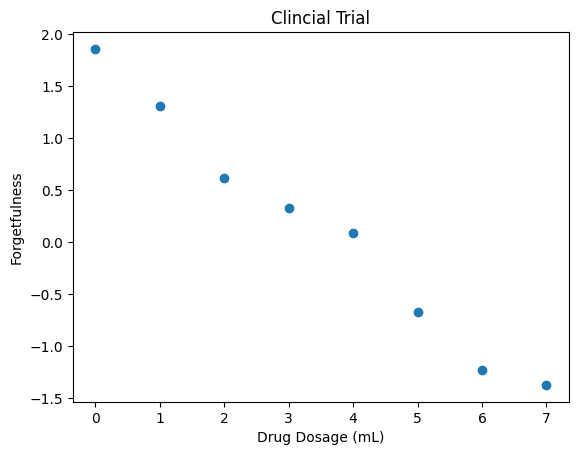

In [11]:
fig, ax = plt.subplots()
plt.title("Clincial Trial")
plt.xlabel("Drug Dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [6]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [13]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [15]:
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    
    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

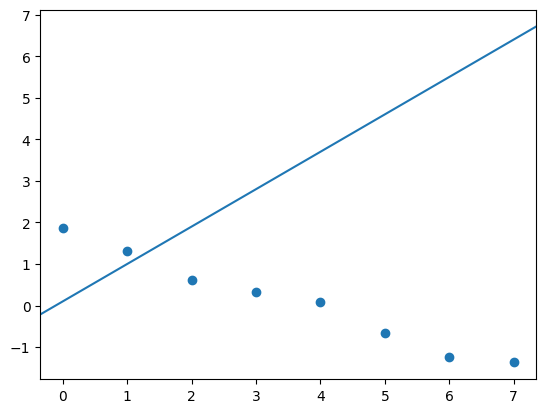

In [16]:
regression_plot(x, y, m, b)

In [17]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [18]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y) ** 2)
    return sigma / len(my_y)

In [19]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [20]:
C.backward()

In [21]:
m.grad

tensor([36.3050])

In [22]:
b.grad

tensor([6.2650])

In [23]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
optimizer.step()

In [25]:
m

tensor([0.5369], requires_grad=True)

In [26]:
b

tensor([0.0374], requires_grad=True)

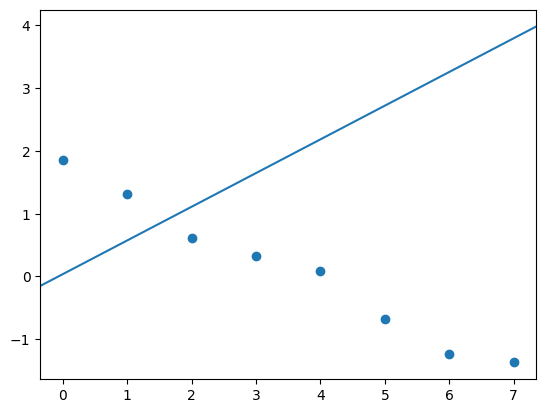

In [27]:
regression_plot(x,y,m,b)

In [29]:
C = mse(regression(x, m, b), y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [ ]:
C.backward

In [32]:
m.grad

tensor([36.3050])

In [33]:
b.grad

tensor([12.5300])

In [35]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [36]:
optimizer.step()

In [37]:
m

tensor([0.1739], requires_grad=True)

In [38]:
b

tensor([-0.0879], requires_grad=True)

In [39]:
epochs = 1000
for epoch in range(epochs):

    optimizer.zero_grad()

    yhat = regression(x, m, b)
    C = mse(yhat, y)
    
    C.backward()
    optimizer.step()

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 2.35, m grad 9.58, b grad 0.806
Epoch 1, cost 1.6, m grad 6.17, b grad 0.12
Epoch 2, cost 1.28, m grad 4, b grad -0.314
Epoch 3, cost 1.15, m grad 2.62, b grad -0.588
Epoch 4, cost 1.09, m grad 1.75, b grad -0.76
Epoch 5, cost 1.06, m grad 1.19, b grad -0.867
Epoch 6, cost 1.04, m grad 0.833, b grad -0.933
Epoch 7, cost 1.02, m grad 0.607, b grad -0.972
Epoch 8, cost 1.01, m grad 0.462, b grad -0.995
Epoch 9, cost 0.997, m grad 0.37, b grad -1.01
Epoch 10, cost 0.985, m grad 0.311, b grad -1.01
Epoch 11, cost 0.974, m grad 0.273, b grad -1.01
Epoch 12, cost 0.963, m grad 0.249, b grad -1.01
Epoch 13, cost 0.952, m grad 0.233, b grad -1.01
Epoch 14, cost 0.941, m grad 0.222, b grad -1.01
Epoch 15, cost 0.931, m grad 0.215, b grad -1
Epoch 16, cost 0.92, m grad 0.21, b grad -0.997
Epoch 17, cost 0.91, m grad 0.206, b grad -0.992
Epoch 18, cost 0.9, m grad 0.203, b grad -0.987
Epoch 19, cost 0.89, m grad 0.201, b grad -0.981
Epoch 20, cost 0.88, m grad 0.2, b grad -0.976
Epo

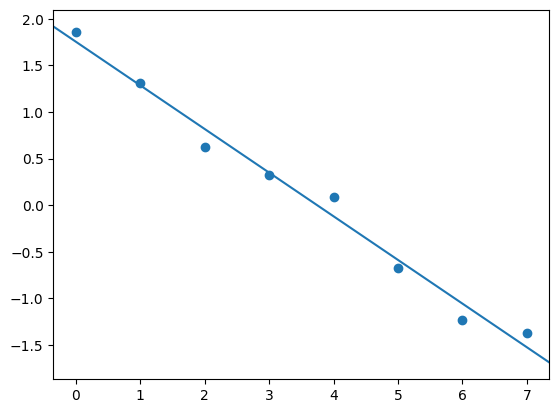

In [40]:
regression_plot(x, y, m, b)

In [41]:
m.item()

-0.46809491515159607